In [41]:
import pandas as pd

# Load the csv file into a pandas dataframe
gefcom = pd.read_csv("gefcomdata.csv")

# Print the first 5 rows of the dataframe
print(gefcom.head())

   Unnamed: 0             ts zone  demand  drybulb  dewpnt      date  year  \
0           1  3/1/2003 0:00   CT  3386.0     25.0    19.0  3/1/2003  2003   
1           2  3/1/2003 1:00   CT  3258.0     23.0    18.0  3/1/2003  2003   
2           3  3/1/2003 2:00   CT  3189.0     22.0    18.0  3/1/2003  2003   
3           4  3/1/2003 3:00   CT  3157.0     22.0    19.0  3/1/2003  2003   
4           5  3/1/2003 4:00   CT  3166.0     23.0    19.0  3/1/2003  2003   

  month  hour day_of_week  day_of_year  weekend holiday_name  holiday  trend  
0   Mar     1         Sat           60     True          NaN    False    0.0  
1   Mar     2         Sat           60     True          NaN    False    1.0  
2   Mar     3         Sat           60     True          NaN    False    2.0  
3   Mar     4         Sat           60     True          NaN    False    3.0  
4   Mar     5         Sat           60     True          NaN    False    4.0  


In [42]:
print(gefcom.columns)

Index(['Unnamed: 0', 'ts', 'zone', 'demand', 'drybulb', 'dewpnt', 'date',
       'year', 'month', 'hour', 'day_of_week', 'day_of_year', 'weekend',
       'holiday_name', 'holiday', 'trend'],
      dtype='object')


In [43]:
gefcom.dtypes

Unnamed: 0        int64
ts               object
zone             object
demand          float64
drybulb         float64
dewpnt          float64
date             object
year              int64
month            object
hour              int64
day_of_week      object
day_of_year       int64
weekend            bool
holiday_name     object
holiday            bool
trend           float64
dtype: object

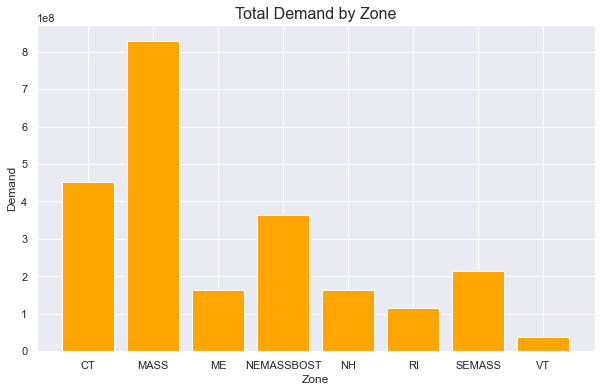

In [44]:
import matplotlib.pyplot as plt

# Group the data by zone and sum the demand
demand_by_zone = gefcom.groupby("zone")["demand"].sum()

# Create a bar chart of demand by zone
fig, ax = plt.subplots(figsize=(10, 6)) # Increase the figure size
ax.bar(demand_by_zone.index, demand_by_zone.values, color="orange") # Set the color of the bars

# Set the chart title and axis labels
ax.set_title("Total Demand by Zone", fontsize=16)
ax.set_xlabel("Zone", fontsize=12)
ax.set_ylabel("Demand", fontsize=12)
plt.savefig("demand_by_zone.jpg", dpi=300, bbox_inches="tight")

# Show the chart
plt.show()


In [45]:
gefcom.columns

Index(['Unnamed: 0', 'ts', 'zone', 'demand', 'drybulb', 'dewpnt', 'date',
       'year', 'month', 'hour', 'day_of_week', 'day_of_year', 'weekend',
       'holiday_name', 'holiday', 'trend'],
      dtype='object')

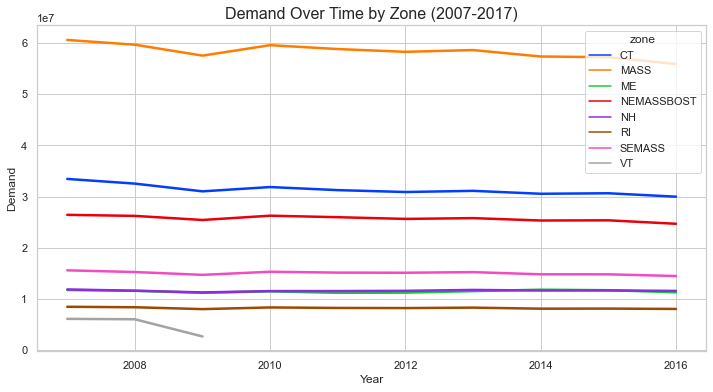

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the "date" column to a datetime object
gefcom["date"] = pd.to_datetime(gefcom["date"])

# Filter the data for the years 2007 to 2016
gefcom = gefcom[(gefcom["date"].dt.year >= 2007) & (gefcom["date"].dt.year <= 2016)]

# Group the data by zone and year, and calculate the total demand for each group
demand_by_zone_year = gefcom.groupby(['zone', gefcom['date'].dt.year])['demand'].sum().reset_index()

# Create a line plot of demand over time for each zone
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=demand_by_zone_year, x='date', y='demand', hue='zone', linewidth=2.5, palette='bright')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Demand',fontsize=12)
plt.title('Demand Over Time by Zone (2007-2017)',fontsize=16)
plt.savefig("demand.jpg", dpi=300, bbox_inches="tight")

plt.show()


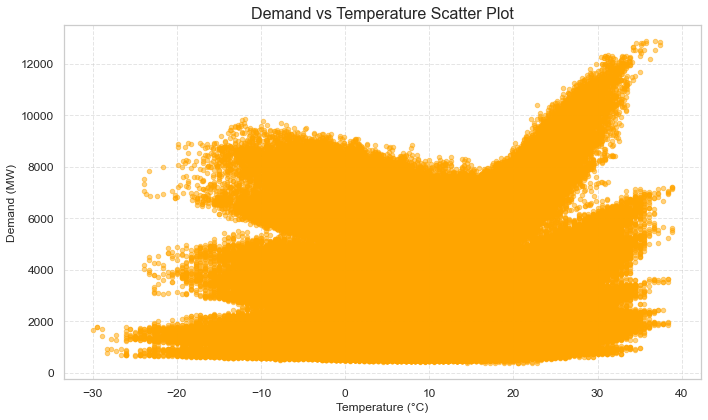

In [47]:
# Convert temperature from F to C
gefcom['drybulb'] = (gefcom['drybulb'] - 32) * 5/9

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gefcom['drybulb'], gefcom['demand'], s=20, alpha=0.5, c='orange')

# Add labels and title
plt.xlabel('Temperature (°C)',fontsize=12)
plt.ylabel('Demand (MW)',fontsize=12)
plt.title('Demand vs Temperature Scatter Plot',fontsize=16)

# Customize the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("demand_vs_temp.jpg", dpi=300, bbox_inches="tight")

plt.show()

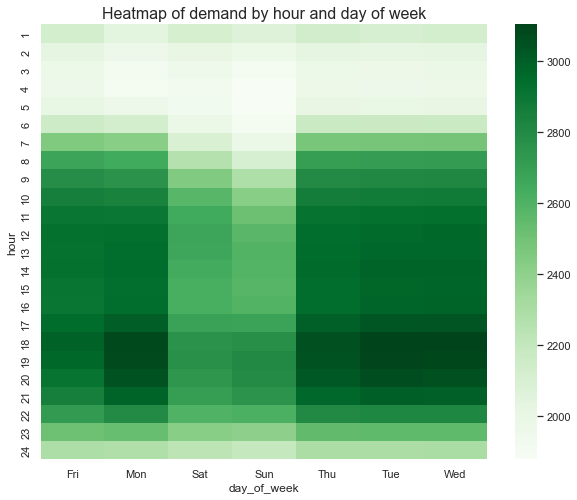

In [51]:

# Create a pivot table to aggregate the demand values by hour and day of week
pivot_table = gefcom.pivot_table(index="hour", columns="day_of_week", values="demand", aggfunc="mean")

# Create the heatmap using seaborn
plt.title('Heatmap of demand by hour and day of week',fontsize=16)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(pivot_table, cmap="Greens")
plt.savefig("heat.jpg", dpi=300, bbox_inches="tight")


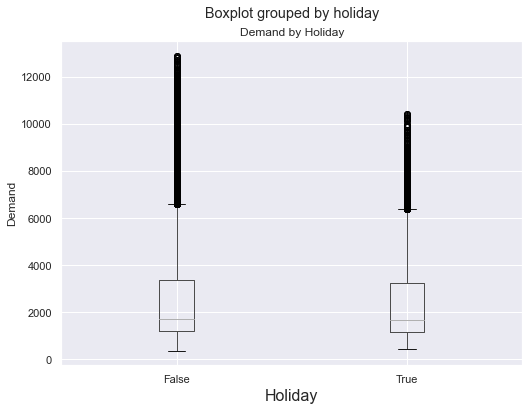

In [54]:
# Filter the data for the years 2007 to 2017
gefcom = gefcom[(gefcom["date"].dt.year >= 2007) & (gefcom["date"].dt.year <= 2017)]

# Create a box plot of demand by holiday
gefcom.boxplot(column="demand", by="holiday", figsize=(8,6))
plt.xlabel("Holiday",fontsize=16)
plt.ylabel("Demand",fontsize=12)
plt.title("Demand by Holiday",fontsize=12)
plt.savefig("demand_by_holiday.jpg", dpi=300, bbox_inches="tight")

plt.show()

# Zone viz Analysis

In [ ]:
# Slicing Data of CT Zone

In [55]:
CT_zone=gefcom.loc[(gefcom["zone"] == "CT"),["demand","drybulb","dewpnt","date","month","hour","day_of_week","day_of_year","weekend","holiday_name","holiday"]]

In [56]:
CT_zone

,demand,drybulb,dewpnt,date,month,hour,day_of_week,day_of_year,weekend,holiday_name,holiday
33640,3124.000,0.000000,26.0,2007-01-01,Jan,1,Mon,1,False,New Year's Day,True
33641,2916.000,0.555556,28.0,2007-01-01,Jan,2,Mon,1,False,New Year's Day,True
33642,2765.000,0.000000,28.0,2007-01-01,Jan,3,Mon,1,False,New Year's Day,True
33643,2694.000,0.000000,30.0,2007-01-01,Jan,4,Mon,1,False,New Year's Day,True
33644,2669.000,0.555556,30.0,2007-01-01,Jan,5,Mon,1,False,New Year's Day,True
...,...,...,...,...,...,...,...,...,...,...,...
121287,3744.918,4.444444,29.0,2016-12-31,Dec,20,Sat,365,True,NaN,False
121288,3558.586,5.000000,30.0,2016-12-31,Dec,21,Sat,365,True,NaN,False
121289,3378.466,3.333333,32.0,2016-12-31,Dec,22,Sat,365,True,NaN,False
121290,3195.386,2.777778,32.0,2016-12-31,Dec,23,Sat,365,True,NaN,False


In [ ]:
CT_zone=pd.DataFrame(CT_zone)
CT_zone.to_csv("CT_zone.csv")

In [ ]:
# Slicing Data to Mass Zone

In [ ]:
Mass_zone=gefcom.loc[(gefcom["zone"] == "MASS"),["demand","drybulb","dewpnt","date","month","hour","day_of_week","day_of_year","weekend","holiday_name","holiday"]]

In [ ]:
Mass_zone

In [ ]:
Mass_zone=pd.DataFrame(Mass_zone)
Mass_zone.to_csv("Mass_zone.csv")

In [ ]:
ME_zone=gefcom.loc[(gefcom["zone"] == "ME"),["demand","drybulb","dewpnt","date","month","hour","day_of_week","day_of_year","weekend","holiday_name","holiday"]]
ME_zone

In [ ]:
ME_zone=pd.DataFrame(ME_zone)
ME_zone.to_csv("ME_zone.csv")

In [ ]:
NEMASSBOST_zone=gefcom.loc[(gefcom["zone"] == "NEMASSBOST"),["demand","drybulb","dewpnt","date","month","hour","day_of_week","day_of_year","weekend","holiday_name","holiday"]]
NEMASSBOST_zone

In [ ]:
NEMASSBOST_zone=pd.DataFrame(NEMASSBOST_zone)
NEMASSBOST_zone.to_csv("NEMASSBOST_zone.csv")

In [ ]:
NH_zone=gefcom.loc[(gefcom["zone"] == "NH"),["demand","drybulb","dewpnt","date","month","hour","day_of_week","day_of_year","weekend","holiday_name","holiday"]]
NH_zone

In [ ]:
NH_zone=pd.DataFrame(NH_zone)
NH_zone.to_csv("NH_zone.csv")

In [ ]:
RI_zone=gefcom.loc[(gefcom["zone"] == "RI"),["demand","drybulb","dewpnt","date","month","hour","day_of_week","day_of_year","weekend","holiday_name","holiday"]]
RI_zone

In [ ]:
RI_zone=pd.DataFrame(RI_zone)
RI_zone.to_csv("RI_zone.csv")

In [ ]:
SEMASS_zone=gefcom.loc[(gefcom["zone"] == "SEMASS"),["demand","drybulb","dewpnt","date","month","hour","day_of_week","day_of_year","weekend","holiday_name","holiday"]]
SEMASS_zone

In [ ]:
SEMASS_zone=pd.DataFrame(SEMASS_zone)
SEMASS_zone.to_csv("SEMASS_zone.csv")

In [ ]:
VT_zone=gefcom.loc[(gefcom["zone"] == "VT"),["demand","drybulb","dewpnt","date","month","hour","day_of_week","day_of_year","weekend","holiday_name","holiday"]]
VT_zone

In [ ]:
VT_zone=pd.DataFrame(VT_zone)
VT_zone.to_csv("VT_zone.csv")